In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('trainingData.csv')

In [3]:
df.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [4]:
# understanding the null values
df.isnull().sum()

Id                          0
city                     1864
age                         0
sex                         0
social_class             5255
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

Description of variables:

• Id: Primary Key

• Personal Details: city, age, sex, social_class

• Financial Details: primary_business, secondary_business, annual_income, monthly_expenses,
old_dependents, young_dependents

• House Details: home_ownership, type_of_house, occupants_count, house_area, sanitary_availability,
water_availability

• Loan Details: loan_purpose, loan_tenure, loan_installments, loan_amount (these contain loan details
of loans that have been previously given, and which have been repaid)

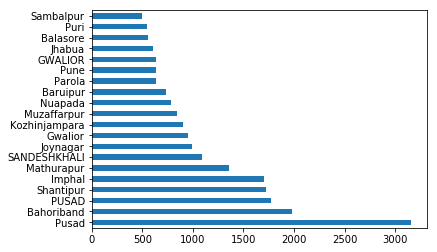

In [5]:
#Exploratory Analysis:
# 1. Understanding the distribution of city. Which city has the max number of loans - Pusad

import matplotlib.pyplot as plt
import plotly.plotly as py

df['city'].value_counts()[:20].plot(kind='barh')

    

In [89]:
# Replacing Nulls (35.0) with underlying distribution of cities:

df['city'].replace(35.0, np.nan, inplace = True)
s = df.type_of_house.value_counts(normalize=True)
missing = df['city'].isnull()
df.loc[missing,'city'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [6]:
# 2. Age - understanding summary statistics of age
df['age'].describe()

# both std dev and max value shows possible contamination in data.


count     40000.00000
mean         55.15990
std        3830.35566
min           2.00000
25%          29.00000
50%          35.00000
75%          42.00000
max      766105.00000
Name: age, dtype: float64

In [7]:
# Since max age for getting loan is 60, counting number of rows that have age > 60 will help us understand the data better
df[df.age>60]['age'].count()

# sorting the age in descending order
df['age'].sort_values(ascending = False)[:20]

## sorting the age in ascending order
df['age'].sort_values(ascending = True)[:20]

11837     2
11732     2
8620     18
29295    18
21687    18
21661    18
27055    18
744      18
38121    18
4163     18
9557     18
12503    18
14194    18
24274    18
31968    18
11512    18
1122     18
35152    18
7630     18
38202    18
Name: age, dtype: int64

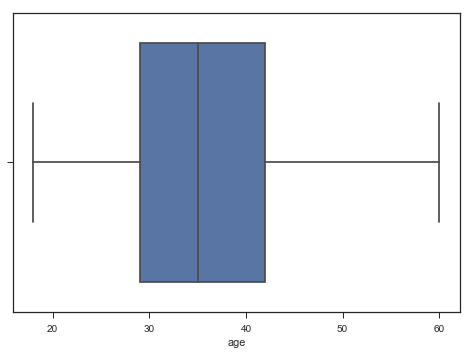

In [197]:
# Univariate detection of outlier.
import seaborn as sns
sns.set(style="ticks")
# sns.lmplot("Id", "age", data=df )

ax = sns.boxplot(x=df["age"])
# Based on above age profiling and this graph, age values > 60 looks aberrant;

In [9]:
# imputation on age > 75 and age < 18 by median value since median seems to be statistic when it comes to age:

median = np.median(df[df['age']<60]['age'])
df.loc[df.age > 60, 'age'] = np.nan
df.loc[df.age < 18, 'age'] = np.nan
df.fillna(median,inplace=True)

In [10]:
# univariate distribution of Sex. 
# Interesting observations: Females are more likely to go for loans. Some TG's are also present

df.groupby('sex')['Id'].count()

sex
F     37622
M      2371
TG        7
Name: Id, dtype: int64

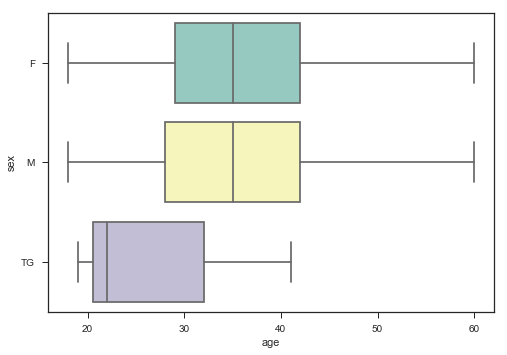

In [11]:
# Bivariate distribution analysis
# Distrbution of age w.r.t sex

ax = sns.boxplot(x=df["age"], y=df["sex"], palette="Set3")
# Distribution of age in Males and Females look identical; However presence of right skeweness in TG 

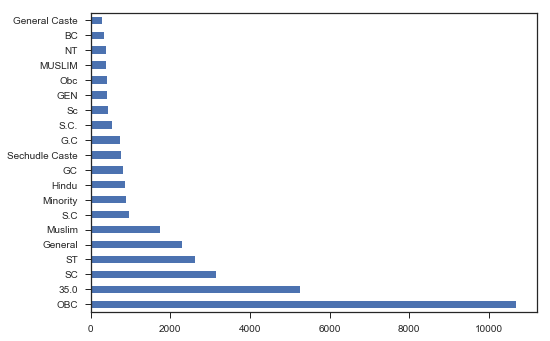

In [12]:
# 4. Social Class

df['social_class'].value_counts()[:20].plot(kind='barh')

# Class with 35.0 ARE NULL's; Python using junk data

In [13]:
# calculating the percentage of NULLs in social class

df[df.social_class==35.0]['social_class'].count()/df['Id'].count()

# approx 13% of the values are Nulls. Would be difficult to impute these values without knowing the underlying -
# cause of the missing data.

# Is it the case for only one missing social class or multiple social classes. 
# On the other hand, the variable looks to have some predictive power

0.13137499999999999

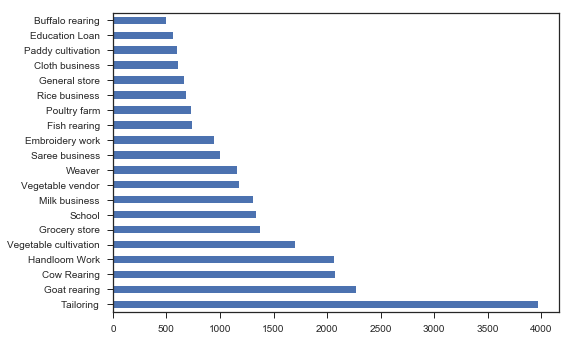

In [14]:
# Primary Business:
df['primary_business'].value_counts()[:20].plot(kind='barh')

# Tailors seems to be taking more loans followed by Goat Rearing. 
# Only 26 values are null and can be dropped from the data set.

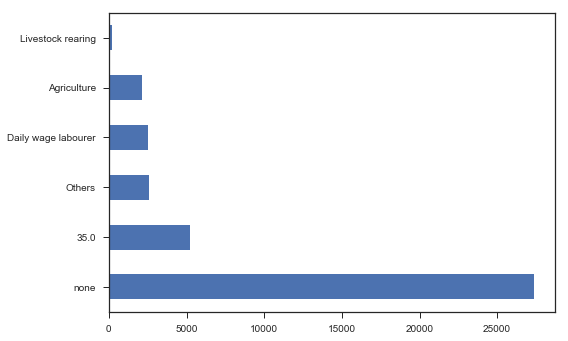

In [15]:
# Secondary Business

# no of Nulls observations are ~13%
df['secondary_business'].value_counts()[:20].plot(kind='barh')

# since most of the values in secondary business are none or nulls, keeping the column wouldn't help in improving
# the predictive power of the model

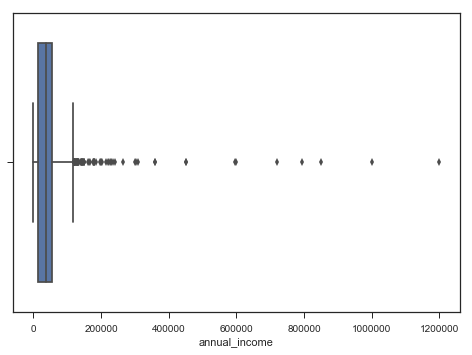

In [16]:
# Annual Income 
# understand the annual income- univariate analysis
ax = sns.boxplot(x=df["annual_income"])

# some extreme values in annual income

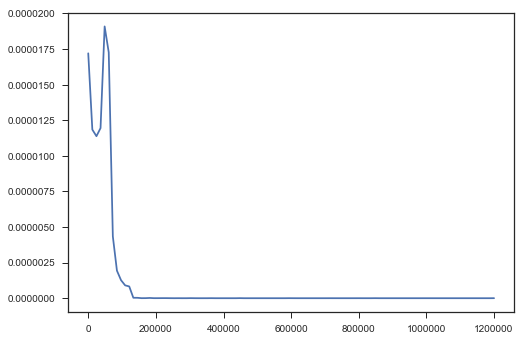

In [17]:
#probability density plot
from scipy.stats.kde import gaussian_kde
from numpy import linspace
data = df["annual_income"]
kde = gaussian_kde( data )
# these are the values over wich your kernel will be evaluated
dist_space = linspace( min(data), max(data), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )

# Outlier Detection and Treatment: 
The logic is to use multiple outlier detection techniques and give vote the observations based on techniques used.
If any observation gets 2 out of 3 vote, then it is outlier, else not

In [18]:
# Outlier Detection:

# Median absolute deviation

def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [19]:
# percentile based deviation

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return ((data < minval) | (data > maxval))

In [20]:
# standard deviation outlier
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

In [21]:
# Calculating outlier vote

def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = list(zip(data.index, x, y, z))
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

In [22]:
# plotting outlier
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

In [23]:
def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(list(zip(data, vote)), columns=['annual_income', 'outlier'])
    if replace == 'median':
        replace = x.annual_income.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in list(zip(data, vote)) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

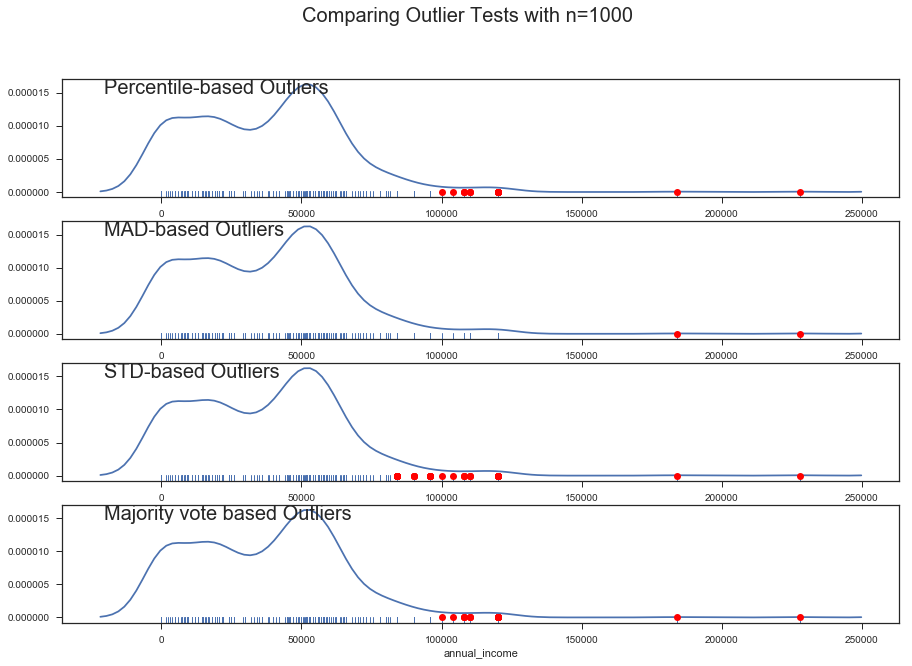

In [24]:
plotOutlier(df.annual_income.sample(1000))

In [25]:
# Replacing the outliers of annual income with the minimum upper annual income

incomeNew = replaceOutlier(df.annual_income, replace='minUpper')

In [26]:
df.annual_income = incomeNew

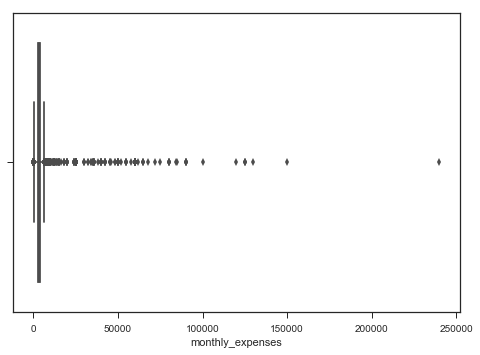

In [27]:
# Monthly Expenses: Univariate Distribution of Monthly expenses

ax = sns.boxplot(x=df["monthly_expenses"])

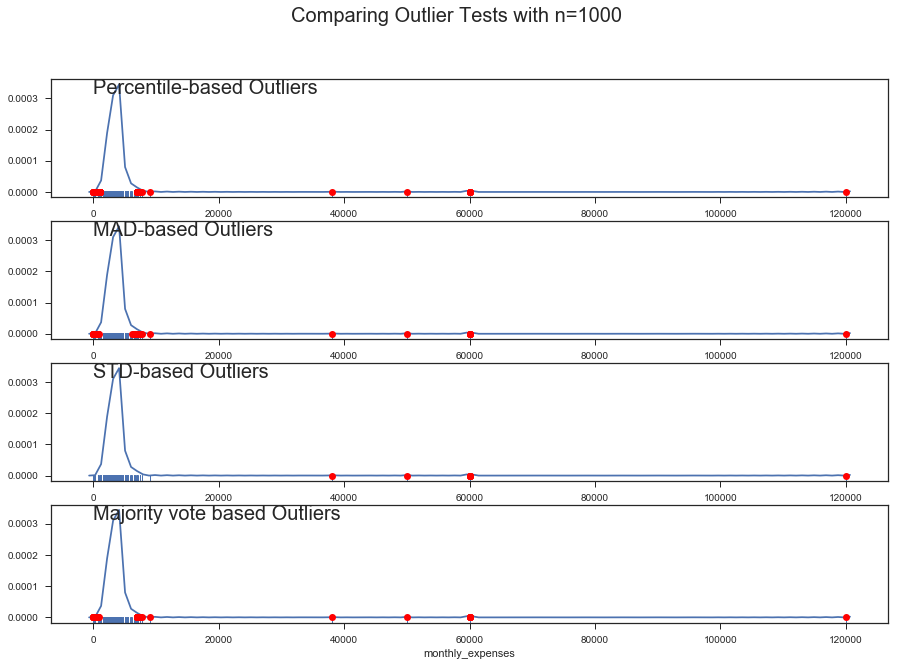

In [28]:
# Outlier detection for monthly expenses:
plotOutlier(df.monthly_expenses.sample(1000))

In [29]:
def replacemOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(list(zip(data, vote)), columns=['monthly_expenses', 'outlier'])
    if replace == 'median':
        replace = x.annual_income.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in list(zip(data, vote)) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

In [30]:
#Replacing the monthly expenses outliers by Median value;
# Rural people likely have same monthly expenses.
incomeNew = replaceOutlier(df.monthly_expenses, replace='median')

In [31]:
df.monthly_expenses= incomeNew

In [32]:
# Analysis on Dependents: old_dependents, young_dependents

df['old_dependents'].describe()

# Max number of old dependents is 3, which is Ok. Hence, no treatment required.

count    40000.000000
mean         0.044900
std          0.222003
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: old_dependents, dtype: float64

In [33]:
df['young_dependents'].describe()

count    40000.00000
mean         1.13710
std          1.07384
min          0.00000
25%          0.00000
50%          1.00000
75%          2.00000
max          7.00000
Name: young_dependents, dtype: float64

(array([  1.47770000e+04,   9.83700000e+03,   1.13840000e+04,
          0.00000000e+00,   3.26900000e+03,   6.20000000e+02,
          0.00000000e+00,   9.00000000e+01,   1.90000000e+01,
          4.00000000e+00]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

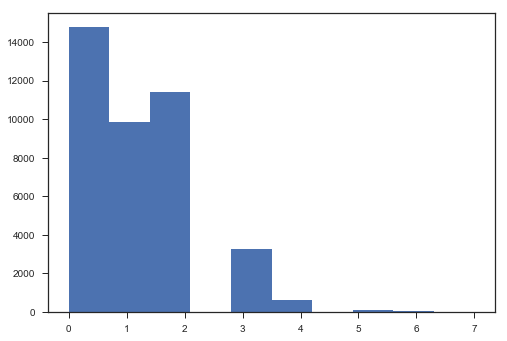

In [34]:
plt.hist(df.young_dependents)

# histogram shows no obvious deviation. Hence no treatment required.

# House Variables analysis and treatment

home_ownership, type_of_house, occupants_count, house_area, sanitary_availability, water_availability

In [35]:
df.head(5)

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22.0,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21.0,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24.0,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,35,26.0,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23.0,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [36]:
vc = df.home_ownership.value_counts()
# Most of them have their own home. The Nulls should be replaced by equal underlying distribution

In [37]:
# Replacing Nulls (35.0) with underlying distribution of 0s and 1s
idx = df.loc[df.home_ownership == 35., 'home_ownership'].sample(frac=vc.loc[0]/vc.loc[1.]).index

df.loc[idx, 'home_ownership'] = 0.

In [38]:
df.loc[df.home_ownership == 35., 'home_ownership'] = 1.

In [39]:
# Type of House
# Replacing 35.0 with Nulls and further by underlying distribution of type of houses
df.groupby('type_of_house')['Id'].count()

type_of_house
35.0      694
R        6499
T1      15092
T2      17715
Name: Id, dtype: int64

In [40]:
df['type_of_house'].replace(35.0, np.nan, inplace = True)


In [41]:
# Replacing NAN's values with the underlying distribution of the different categoris of houses i.e R, T1, T2
s = df.type_of_house.value_counts(normalize=True)

In [42]:
missing = df['type_of_house'].isnull()
df.loc[missing,'type_of_house'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

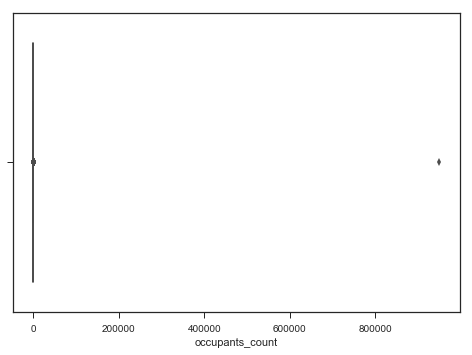

In [43]:
# Occupants count
# No nulls
# check for distribution 
ax = sns.boxplot(x=df["occupants_count"])

# Outlier needs to be treated: Replacing with median value

In [44]:
df['occupants_count'].describe()
# 950000 is outlier. On deeper look, the occupants count have too many outliers. 
# No of dependents > 100 is absurd.

count     40000.000000
mean         26.641000
std        4749.995485
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max      950000.000000
Name: occupants_count, dtype: float64

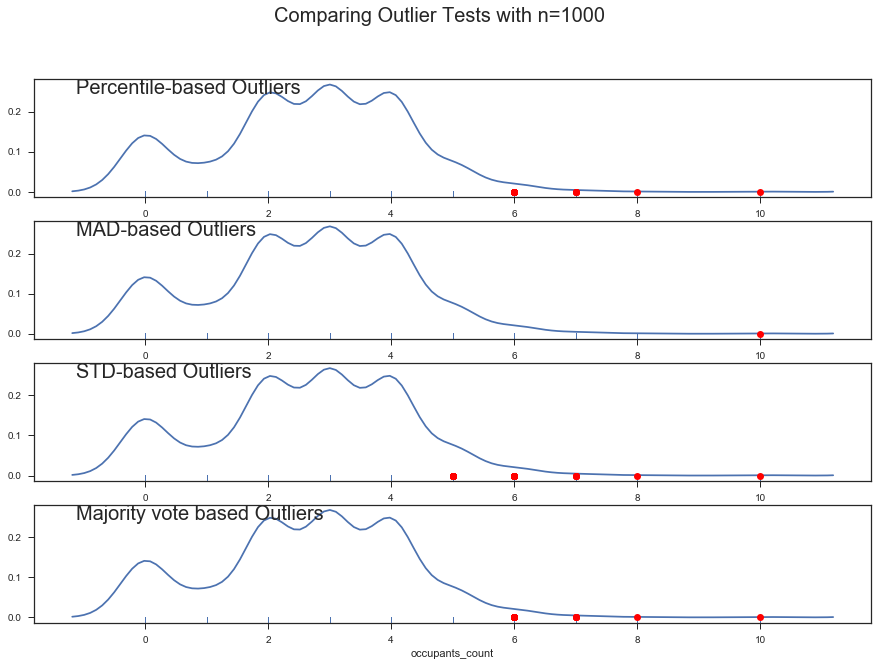

In [45]:
# plot outlier
plotOutlier(df.occupants_count.sample(1000))

 Using majority based outlier, seems like no of dependents > 6 looks to be outlier
 However, heuristically, we have joint families. Hence, number of dependents > 10 seems to be outlier and should be replaced

In [46]:
# if no of occupants > 10, replace it by median
occNew = []
for var in df.occupants_count:
    if var > 10:
        occNew.append(10)
    else:
        occNew.append(var)

In [47]:
df.occupants_count = occNew

In [48]:
# validating if the treatment is successful or not
df['occupants_count'].describe()

count    40000.000000
mean         2.734125
std          1.571002
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: occupants_count, dtype: float64

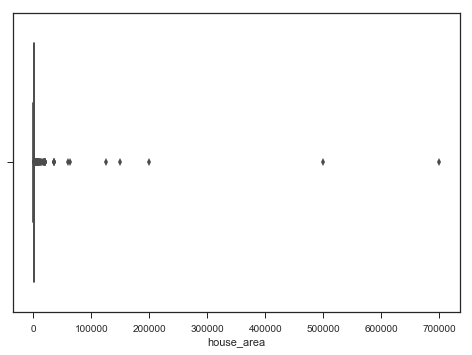

In [49]:
# House Area:
ax = sns.boxplot(x=df["house_area"])


In [50]:
df['house_area'].describe()

count     40000.000000
mean        552.804750
std        4596.921905
min           0.000000
25%         200.000000
50%         400.000000
75%         600.000000
max      700000.000000
Name: house_area, dtype: float64

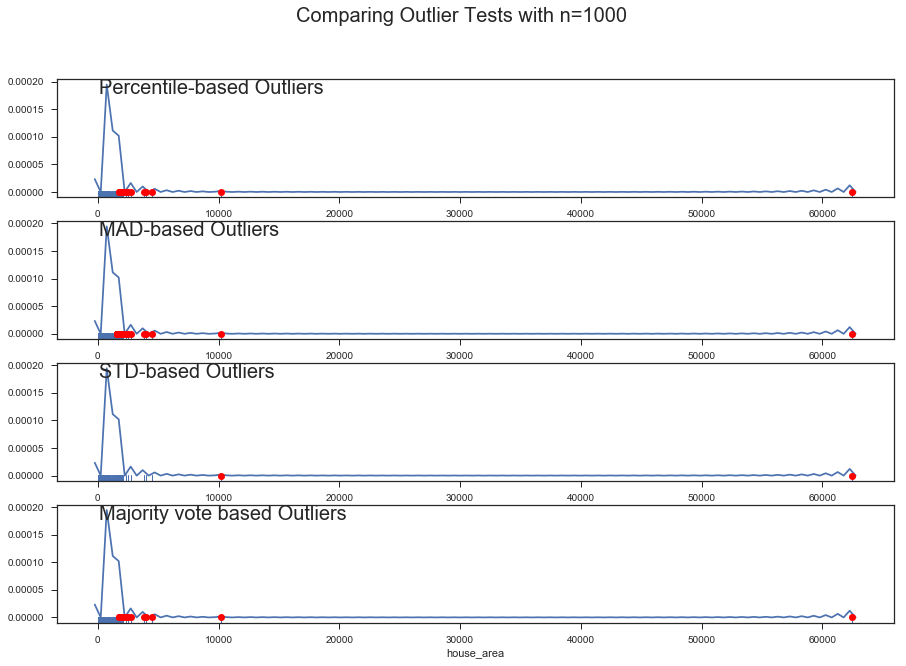

In [51]:
plotOutlier(df.house_area.sample(1000))

In [52]:
# Since rural places more likely to have big houses, anything greater than 5000 needs to be replaced with IQR3.
# Extreme values looks erroneous.

In [53]:
areaNew = []
for var in df.house_area:
    if var > 5000:
        areaNew.append(600)
    else:
        areaNew.append(var)

In [54]:
df.house_area = areaNew

In [55]:
# validating if the treatment is successful or not
df['house_area'].describe()

count    40000.000000
mean       484.243575
std        463.548075
min          0.000000
25%        200.000000
50%        400.000000
75%        600.000000
max       5000.000000
Name: house_area, dtype: float64

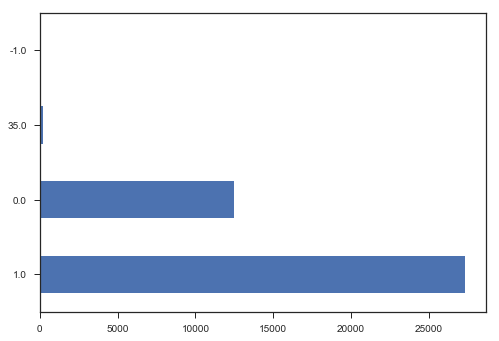

In [56]:
#sanitary_availability
df['sanitary_availability'].value_counts().plot(kind='barh')

In [57]:
# Nulls treatment:

df['sanitary_availability'].replace(35.0, np.nan, inplace = True)

In [58]:
# Replacing Nulls values with 0s and 1s as per underlying distribution
s = df.sanitary_availability.value_counts(normalize=True)

In [59]:
missing = df['sanitary_availability'].isnull()
df.loc[missing,'sanitary_availability'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

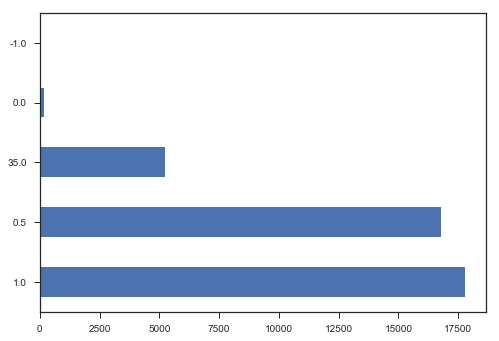

In [60]:
# water_availabity
df['water_availabity'].value_counts().plot(kind='barh')

# Since the data has more than 10% as missing values, we can drop the variable

# Loan Variables treatment and analysis

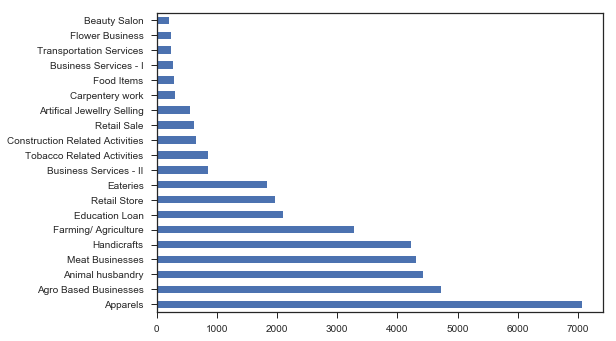

In [61]:
# loan purpose

df['loan_purpose'].value_counts()[:20].plot(kind='barh')


In [62]:
# Nulls treatment: Randomly replace with any values, as nulls would hardly have any impact.
# Replacing Nulls with Apparels
df['loan_purpose'].fillna('Apparels', inplace=True)

In [63]:
# Loan Tenure:
df['loan_tenure'].describe()
# Loan tenure variable looks Ok, no treatment required

count    40000.000000
mean        12.032225
std          1.367473
min          3.000000
25%         12.000000
50%         12.000000
75%         12.000000
max         84.000000
Name: loan_tenure, dtype: float64

In [64]:
# Loan Installment:
df['loan_installments'].describe()
# Loan tenure variable looks Ok, no treatment required

count    40000.000000
mean        21.761175
std         16.682458
min          0.000000
25%         12.000000
50%         12.000000
75%         50.000000
max         84.000000
Name: loan_installments, dtype: float64

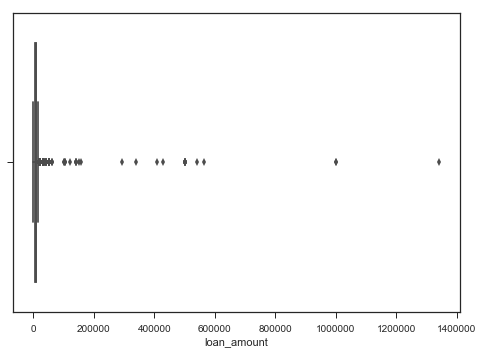

In [65]:
# Loan Amount: Dependent variable

# Treating this as numerical:
ax = sns.boxplot(x=df["loan_amount"])


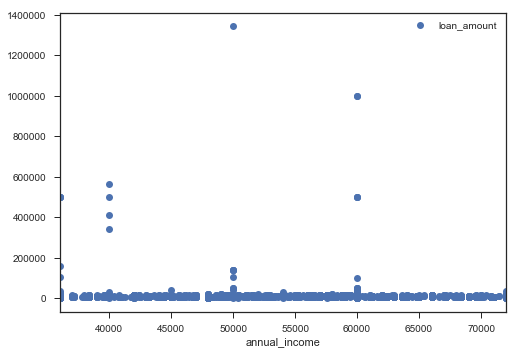

In [66]:
# Correlation analysis of loan amount with annual income
# The rationale is to find if there is any correlation between loan amount and monthly income,
# if yes, then outlier could be treated accordingly


df.plot(x='annual_income', y='loan_amount', style='o')

In [67]:
# calculating correletion coefficient with annual income.
# There seems to be no strong correlation with income. Hence resorting back to vote based outlier detection.
from scipy.stats.stats import pearsonr   
np.corrcoef(df['annual_income'],df['loan_amount'])

array([[ 1.        ,  0.08750863],
       [ 0.08750863,  1.        ]])

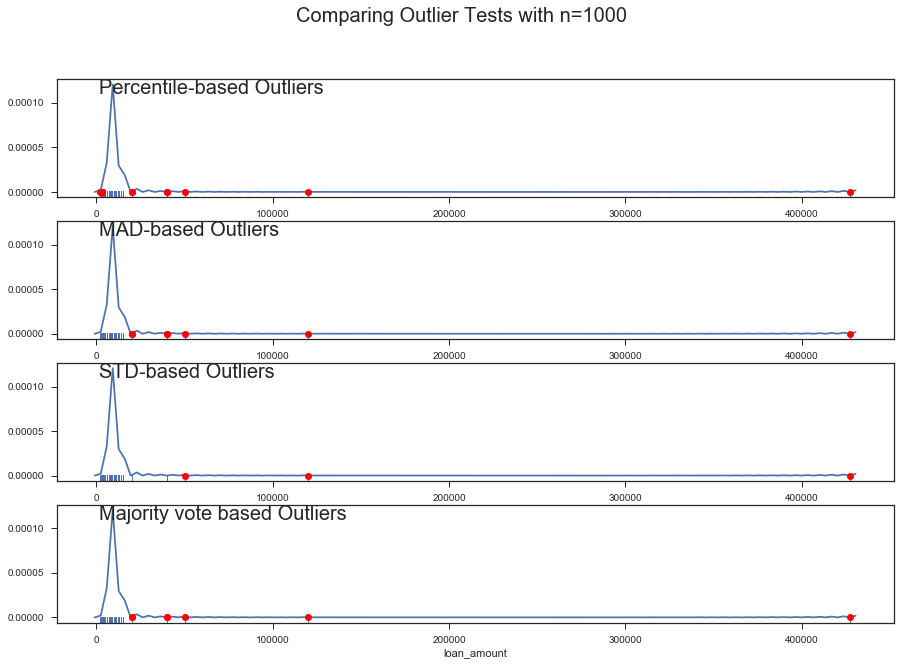

In [68]:
plotOutlier(df.loan_amount.sample(1000))

In [69]:
# Replacing majoirty based outliers with the minimum upper value of loan
amountNew = replaceOutlier(df.loan_amount, replace='minUpper')
df.loan_amount= amountNew

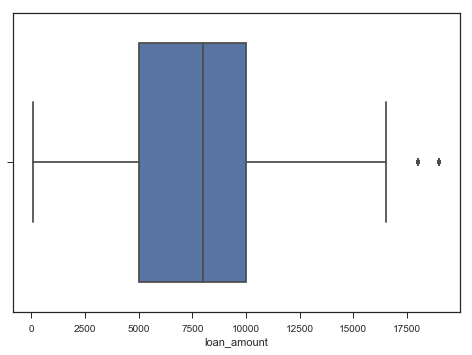

In [70]:
ax = sns.boxplot(x=df["loan_amount"])
# Looks more or less valid

# Model Generation


In [71]:
# create correlation matrix:
df.corr(method='pearson', min_periods=1)

#there isn't seems to be strong correlation involved among variables.

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
Id,1.000000,0.044392,0.515448,-0.076998,0.044053,0.109523,0.094404,0.259184,0.311475,0.003571,-0.321019,-0.062596,-0.225166,0.518570
age,0.044392,1.000000,0.061784,-0.015728,0.123209,-0.227476,0.038473,0.043134,0.072671,-0.024634,-0.024699,-0.044288,-0.045242,0.064279
annual_income,0.515448,0.061784,1.000000,0.171479,0.067751,0.265667,0.024843,0.388517,0.231790,0.268356,-0.566663,-0.043795,-0.126031,0.337760
monthly_expenses,-0.076998,-0.015728,0.171479,1.000000,-0.023028,0.054631,-0.068886,0.131858,-0.250607,0.122906,-0.004478,-0.057373,0.254711,0.001398
old_dependents,0.044053,0.123209,0.067751,-0.023028,1.000000,-0.093778,0.008559,0.093941,0.087891,0.028987,-0.078990,-0.022390,-0.033921,0.033371
young_dependents,0.109523,-0.227476,0.265667,0.054631,-0.093778,1.000000,0.025037,0.481488,0.160729,0.226384,-0.412122,-0.015778,-0.064783,0.115622
home_ownership,0.094404,0.038473,0.024843,-0.068886,0.008559,0.025037,1.000000,0.050897,0.069429,0.039707,-0.077661,-0.097052,0.020885,0.038024
occupants_count,0.259184,0.043134,0.388517,0.131858,0.093941,0.481488,0.050897,1.000000,0.374289,0.421366,-0.676740,-0.044691,-0.014747,0.223492
house_area,0.311475,0.072671,0.231790,-0.250607,0.087891,0.160729,0.069429,0.374289,1.000000,0.307456,-0.399830,0.010435,-0.209199,0.199900
sanitary_availability,0.003571,-0.024634,0.268356,0.122906,0.028987,0.226384,0.039707,0.421366,0.307456,1.000000,-0.550308,0.007658,0.174890,0.161658


In [72]:
# creating a new copy of data frame:

df1 = df.copy()

In [73]:
df1.head(2)

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22.0,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21.0,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0


In [74]:
# creating dummies for cols: primary business, secondary business, 

col_names =['primary_business','secondary_business','loan_purpose','type_of_house','sex','city']
df_with_dummies = pd.get_dummies(df1, columns = col_names )


In [75]:
# Predicting Nulls in social class

# Creating train and test group.
train = df_with_dummies[df_with_dummies.social_class != 35.0]
test = df_with_dummies[df_with_dummies.social_class == 35.0]

In [76]:
train.shape, test.shape

((34745, 1364), (5255, 1364))

In [77]:

X_train = train.drop(['social_class', 'loan_amount'], axis=1)
y_train = train.social_class
X_test = test.drop(['social_class', 'loan_amount'], axis=1)

In [78]:
# Build a logistic regression to predict social class:

#from sklearn.linear_model import LogisticRegression
# lr =LogisticRegression(penalty ='l1',C=1)
#lr.fit(X_train,y_train)
# print('Training Accurcy:',lr.score(X_train,y_train))

In [79]:
# Builiding logisitic regression to predict social class is computationally expensive.
# Hence dropping the social class variable from the model generation. Ideally, it should be there.

# Building a regression

In [186]:
df1.head(2)

,Id,city,age,sex,primary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22.0,F,Tailoring,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,Apparels,12,12,5000.0
1,2,Manjapra,21.0,F,Tailoring,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,Apparels,12,50,7500.0


In [117]:
# One Hot Encoding for categorical variables
# city, sex, primary_business, type_of_house, loan_purpose

col_names =['primary_business','loan_purpose','type_of_house','sex','city']
df_with_dummies = pd.get_dummies(df1, columns = col_names )

In [118]:

pX = df_with_dummies.drop('loan_amount', axis=1)
py = df_with_dummies.loan_amount

In [119]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pX, py, test_size=0.25)

In [141]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30000, 1355), (10000, 1355), (30000,), (10000,))

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lmMod = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)

In [165]:
y_train_preds = lmMod.predict(X_train)
y_test_preds = lmMod.predict(X_test)

In [158]:
import sklearn
print('R^2 train: %.3f' % (sklearn.metrics.r2_score(y_train, y_train_pred)))

R^2 train: 0.605


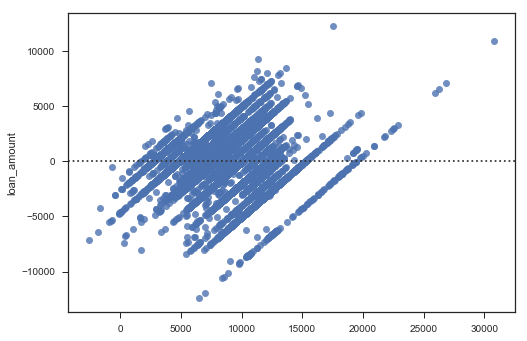

In [177]:
# plotting residual:

sns.residplot(y_train_preds,y_train_preds- y_train)
# Residual plot looks erroneous. Since R^2 looks little low, lets move to Tree based regression approach

# Model Interpretation

In [196]:

X2 = sm.add_constant(pX)
est = sm.OLS(py, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sun, 30 Jul 2017   Prob (F-statistic):               0.00
Time:                        18:20:58   Log-Likelihood:            -3.5784e+05
No. Observations:               40000   AIC:                         7.183e+05
Df Residuals:                   38692   BIC:                         7.295e+05
Df Model:                        1307                                         
Covariance Type:            nonrobust                                         
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

# Since p values of loan purpose > .5, the loan purpose variable is statistically insignificant and can be removed from the model

# Random Forest Regression


In [147]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators =1000, criterion ='mse', random_state=1, n_jobs =-1)

In [148]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [168]:
y_train_pred = forest.predict(X_train)


In [169]:
y_test_pred = forest.predict(X_test)

In [151]:
print('MSE train: %.3f, test: %.3f' %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test,y_test_pred)))

MSE train: 251683.232, test: 1824778.957


In [154]:
import sklearn
print('R^2 train: %.3f, test: %.3f' % (sklearn.metrics.r2_score(y_train, y_train_pred), sklearn.metrics.r2_score(y_test,y_test_pred)))

R^2 train: 0.973, test: 0.804


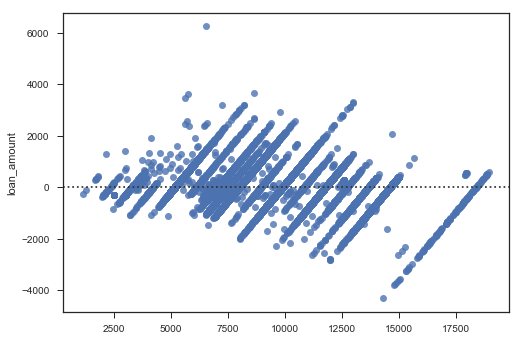

In [175]:
sns.residplot(y_train_pred,y_train_pred- y_train)

# The residuals are better distributed in Random Forest classifier than Linear Regression ,however model is not able to capture all the explantory information. 

# Model Improvements:

1) In Linear regression, come up with higher order polynomials features

2) Try Lasso or Ridge to reduce the number of features

3) Come up with new features

4) Employ Dimension reduction techniques
